In [1]:
import sys
import os
import numpy as np
import pystan

# handling different types of data
import pandas as pd
import pickle as pk
import shelve
import h5py

In [2]:
pickleFn =  'histFHOG_largeRange_setting1.data.p'
shelveFn = 'histFHOG_largeRange_setting1.shelve'

print "pickleFn : ", pickleFn
print "shelveFn :", shelveFn


# reading pickle and shelve files
print "Reading the shelve file ..."
# tic()
fid = shelve.open(shelveFn,'r')
metaVoxelDict = fid['metaVoxelDict']
#pca = fid['pcaHist']
subjList = fid['subjList']
phenotypeDB_clean = fid['phenotypeDB_clean']
fid.close()
print "Done !"

pickleFn :  histFHOG_largeRange_setting1.data.p
shelveFn : histFHOG_largeRange_setting1.shelve
Reading the shelve file ...
Done !


In [6]:
len(metaVoxelDict)

7292

In [7]:
len(subjList)

7292

In [8]:
type(metaVoxelDict[0])

dict

In [9]:
metaVoxelDict[0].keys()

['fHOGImgFn', 'labelIndex', 'lungImgFn', 'lungMaskFn', 'id', 'superVoxelFn']

In [10]:
metaVoxelDict[0]['labelIndex']

array([119, 132, 133, 154, 163, 170, 180, 181, 182, 184, 185, 193, 199,
       209, 213, 214, 219, 220, 222, 223, 224, 225, 226, 240, 242, 249,
       255, 256, 260, 262, 267, 268, 269, 273, 277, 289, 290, 292, 293,
       301, 302, 304, 308, 309, 311, 312, 313, 320, 322, 327, 328, 329,
       331, 334, 335, 337, 340, 343, 345, 348, 353, 356, 357, 360, 361,
       362, 365, 370, 375, 380, 386, 388, 390, 396, 400, 403, 407, 410,
       412, 413, 414, 415, 417, 420, 421, 428, 429, 433, 442, 445, 446,
       447, 448, 452, 453, 457, 458, 461, 463, 464, 465, 467, 472, 476,
       477, 478, 483, 489, 495, 496, 497, 498, 499, 502, 505, 507, 509,
       511, 514, 526, 527, 528, 530, 531, 535, 536, 547, 555, 556, 557,
       562, 566, 568, 570, 572, 573, 574, 579, 580, 582, 583, 591, 598,
       604, 609, 610, 611, 614, 621, 622, 625, 626, 629, 637, 642, 647,
       652, 653, 654, 656, 658, 668, 669, 671, 686, 687, 695, 699, 704,
       706, 707, 709, 712, 723, 728, 737, 740, 765, 774, 796])

In [14]:
metaVoxelDict[81]['id']

'10160C'

In [13]:
subjList[81]

'10160C'

In [16]:
print "lungImgFn:", metaVoxelDict[81]['lungImgFn']
print "superVoxelFn:", metaVoxelDict[81]['superVoxelFn']
print "fHOGImgFn:", metaVoxelDict[81]['fHOGImgFn']


lungImgFn: /scratch/users/batmanghelich/COPDGene/phaseII-nii/10160C_INSP_STD_UIA_COPD_BSpline_Iso1.0mm.nii.gz
superVoxelFn: /scratch/users/batmanghelich/COPDGene/work/kayhan/Supervoxels/monoSLIC/numSP30mm/10160C_INSP_STD_UIA_COPD_BSpline_Iso1.0mm_SuperVoxel_Param30mm.nii.gz
fHOGImgFn: /scratch/users/batmanghelich/COPDGene/work/kayhan/FourierHOG/10160C_INSP_STD_UIA_COPD_BSpline_Iso1.0mm_sigma_smooth5.0_max_band5_nTheta16_nPhi16_FourierHOG.nii.gz


In [17]:
type(phenotypeDB_clean)

pandas.core.frame.DataFrame

In [20]:
phenotypeDB_clean.shape

(7292, 362)

In [21]:
phenotypeDB_clean.head()

,sid,ccenter,distwalked,O2,Walk_Course,Walk_Limit,WalkSymp_BackPain,WalkSymp_JointPain,WalkSymp_Legs_Fatigue,WalkSymp_ShortnessBreath,...,deltaFEV1,deltaFVC,BDR_pct_FEV1,BDR_pct_FVC,BDR,NewGOLD_SGRQ,RandomGroupCode,Pred_FEV1_FVC_LLN,Visit_Year,CT_Scan_Year
0,10002K,BWH,978,0,1,0,NaN,NaN,NaN,NaN,...,-0.021,0.012,-3.4,0.6,0,D1,9,0.68,2007,2007
1,10004O,BWH,1166,NaN,1,0,NaN,NaN,NaN,NaN,...,0.175,0.159,17.7,5.1,0,D1,7,0.64,2007,2007
2,10005Q,NJC,1765,0,1,0,NaN,NaN,NaN,NaN,...,-0.257,-0.171,-8.1,-4.3,0,A,5,0.69,2008,2008
3,10006S,BWH,1147,2,1,0,NaN,NaN,NaN,NaN,...,-0.010,0.174,-0.8,6.1,0,B,10,0.68,2008,2008
5,10009Y,NJC,1290,0,1,1,0,1,1,0,...,0.206,0.245,12.8,8.3,1,B,7,0.64,2008,2008


In [23]:
phenotypeDB_clean.

Index([u'sid', u'ccenter', u'distwalked', u'O2', u'Walk_Course', u'Walk_Limit',
       u'WalkSymp_BackPain', u'WalkSymp_JointPain', u'WalkSymp_Legs_Fatigue',
       u'WalkSymp_ShortnessBreath',
       ...
       u'deltaFEV1', u'deltaFVC', u'BDR_pct_FEV1', u'BDR_pct_FVC', u'BDR',
       u'NewGOLD_SGRQ', u'RandomGroupCode', u'Pred_FEV1_FVC_LLN',
       u'Visit_Year', u'CT_Scan_Year'],
      dtype='object', length=362)


In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


ValueError: x has only one data point. bins or range kwarg must be given

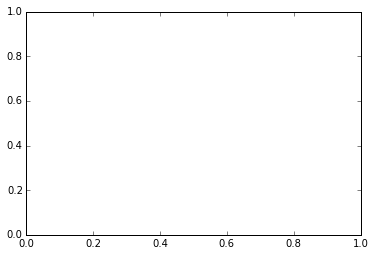

In [29]:
_= hist(phenotypeDB_clean.FEV1_utah.as_matrix)

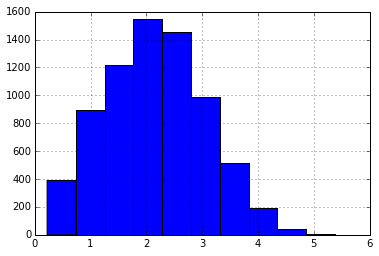

In [30]:
phenotypeDB_clean.FEV1_utah.hist()

In [31]:
fid = open(pickleFn,'rb')
data = pk.load(open(pickleFn,'rb'))
fid.close()


In [32]:
type(data)

list

In [33]:
len(data)

7292

In [34]:
type(data[0])

dict

In [35]:
data[0].keys()

['I', 'G']

In [36]:
type(data[0]['I'])

numpy.ndarray

In [37]:
data[0]['I'].shape

(180, 63)

In [38]:
len(metaVoxelDict[0]['labelIndex'])

180

In [39]:
data[0]['I'][25,]

array([  1.46233499e-03,   1.53782310e-01,   3.65465181e-01,
         2.56975733e-01,   1.21413327e-01,   4.84151450e-02,
         2.22512054e-02,   1.26867441e-02,   6.87692673e-03,
         4.07082444e-03,   2.60848945e-03,   1.42281243e-03,
         1.18567702e-03,   3.16180539e-04,   4.34748241e-04,
         3.95225674e-04,   3.95225674e-05,   3.95225674e-05,
         3.95225674e-05,   3.95225674e-05,   0.00000000e+00,
         3.95225674e-05,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   3.95225674e-05,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   7.20427104e-01,
         3.38437035e-01,   2.24921860e-01,   2.96001482e-01,
         3.05409010e-01,   2.99243960e-01,   1.46867791e-02,
         1.80501421e-02,   4.20847832e-02,   4.70585546e-02,
         3.35823313e-02,   4.50612677e-02,   5.21167773e-02,
         5.46524731e-02,

In [41]:
metaVoxelDict[0]['labelIndex'][25]

249